# Notebook for cleaning, EDA, and Model Development
---
*By Saraswathi R.*

## Load Data

In [1]:
import numpy as np
import pandas as pd
# import requests
# import io

In [ ]:
# response = requests.get("https://github.com/Patcharanat/GrabSpark-Data-Analytics-for-Business-Use-Cases/blob/master/sample_a.csv")
# pd.read_csv(response.content)
# pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# must use raw file (corrected approach)
# response = requests.get("https://raw.githubusercontent.com/Patcharanat/ecommerce-invoice/master/data/cleaned_data.csv")
# content = response.text
# print(content)

In [ ]:
# use encoding = 'latin1' because the data has a ( a currency sign lie $ ) that make it hard to be read without encoding.
# reading the uncleaned raw data.csv file
# df= pd.read_csv(r"E:\Smartcart_Retail_Analytics\data\uncleaned_data.csv", encoding= 'latin1')

In [ ]:
# df = pd.read_csv("./data/uncleaned_data.csv", encoding='cp1252')
# df = pd.read_csv("./data/uncleaned_data.csv")
# df = pd.read_csv("./data/data_url_uncleaned.csv", low_memory=False)
# df = pd.read_csv("./data/data_api_uncleaned.csv", encoding='cp1252')
# df = pd.read_csv("./data/data_postgres_cleaned.csv", encoding='cp1252')
# df = pd.read_csv("./data/data_postgres_cleaned.csv")
# df = pd.read_csv("./data/data_api_uncleaned.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/Patcharanat/ecommerce-invoice/master/data/cleaned_data.csv")

# reading the cleaned data in parquest format that is stored 
df = pd.read_parquet("E:\Smartcart_Retail_Analytics\data\ecomm_invoice_transaction.parquet")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Domain Knowledge

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Basic checks & Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
 8   total_spend  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID,total_spend
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671,17.987795
std,218.081158,96.759853,6777.908326,378.810824
min,-80995.000000,-11062.060000,0.000000,-168469.600000
25%,1.000000,1.250000,12352.000000,3.400000
50%,3.000000,2.080000,14382.000000,9.750000
75%,10.000000,4.130000,16255.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
# Data Quality issues
# 1. Negative values in Quantity and UnitPrice: Returns/ Refunds (normal), Possibel data entry errors
# 2. Extreme values: very large orders (80, 995)--> These could be legitimate or errors

In [ ]:
# for catgorical features
df.describe(include= 'O').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,3958,85123A,2380
Description,541909,3800,WHITE HANGING HEART T-LIGHT HOLDER,2380
Country,541909,38,United Kingdom,495478


In [25]:
df.nunique()

InvoiceNo      25900
StockCode       3958
Description     3800
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
Country           38
total_spend     6204
dtype: int64

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_spend    0
dtype: int64

In [ ]:
df.loc[df['Description'].isnull()].head()
# df.loc[df['Description'].isnull() & df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend


In [19]:
df.loc[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend


In [ ]:
# checking unitprice for negative values
df.loc[df['UnitPrice'] < 0]

# only two rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom,-11062.06


In [ ]:
df.loc[df['Quantity'] < 0]

# 10624 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [23]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_spend'],
      dtype='object')

In [12]:
df.loc[df['StockCode'] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend


In [33]:
df.loc[df['InvoiceNo'] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom,-27.5


<Axes: >

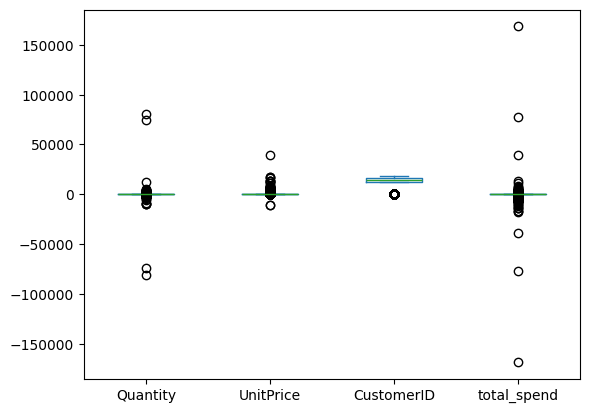

In [34]:
df.plot(kind='box')

### Fill NA

In [35]:
df_temp = df.copy()

In [36]:
df_temp['Description'] = df['Description'].fillna('No Description')

In [37]:
df_temp['CustomerID'] = df['CustomerID'].fillna(0)
df_temp['CustomerID'] = df_temp['CustomerID'].astype(float).astype(int)

In [38]:
df_temp['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df_temp.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_spend    0
dtype: int64

In [ ]:
df_temp.head()

In [41]:
df_temp['InvoiceNo'] = df_temp['InvoiceNo'].astype(str)
df_temp['StockCode'] = df_temp['StockCode'].astype(str)
df_temp['Description'] = df_temp['Description'].astype(str)
# df_temp['Quantity'] = df_temp['Quantity']
# df_temp['InvoiceDate'] = df_temp['InvoiceDate']
# df_temp['UnitPrice'] = df_temp['UnitPrice'].astype('float64')
df_temp['Country'] = df_temp['Country'].astype(str)

In [55]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   total_spend  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 35.1+ MB


In [60]:
df_temp.to_csv(r"E:\Smartcart_Retail_Analytics\data\cleaned_data.csv", index=False)


## EDA

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="dark")
plt.style.use("ggplot")

In [62]:
df_temp = pd.read_csv(r"E:\Smartcart_Retail_Analytics\data\cleaned_data.csv") # 

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
 8   total_spend  541909 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
# total amount spent per row

df_temp["total_spend"] = df_temp["Quantity"] * df_temp["UnitPrice"]
df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [68]:
daily_sales = df_temp.groupby('InvoiceDate')['total_spend'].sum().sort_index()
x = daily_sales.index
y = daily_sales.values

In [69]:
x

Index(['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
       '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
       '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
       '2010-12-01 09:32:00',
       ...
       '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
       '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
       '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
       '2011-12-09 12:50:00'],
      dtype='object', name='InvoiceDate', length=23260)

In [70]:
y

array([139.12,  22.2 , 348.78, ..., 329.05, 339.2 , 249.45])

In [71]:
timeseries_data = pd.DataFrame({'invoice_date': x, 'total_spend': y})
timeseries_data.head()

,invoice_date,total_spend
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86


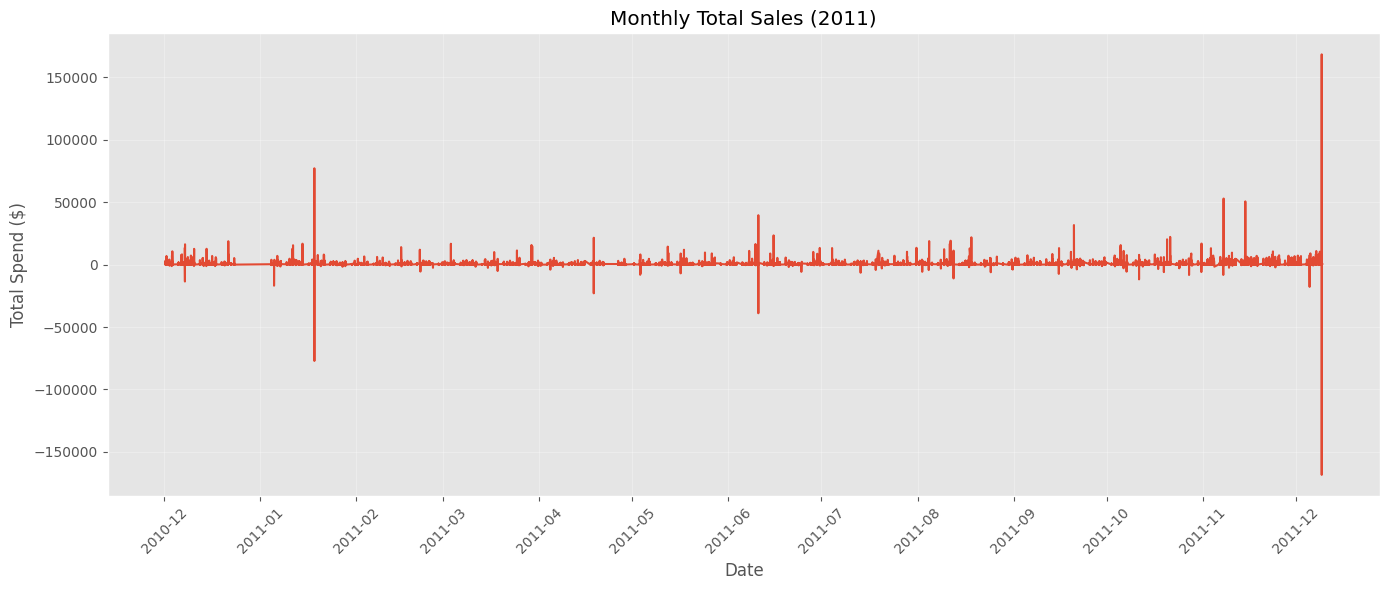

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure datetime and set as index (most efficient)
timeseries_data['invoice_date'] = pd.to_datetime(timeseries_data['invoice_date'])
timeseries_data = timeseries_data.set_index('invoice_date')

# 2. Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=timeseries_data, x=timeseries_data.index, y='total_spend')

# 3. Format the x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))

# Shows full date with time (e.g., "2023-01-15 00:00:00")
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# # Shows abbreviated month and year (e.g., "Jan 2023")
# .DateFormatter('%b %Y'))

# Shows quarter and year (e.g., "Q1-2023")
# .DateFormatter('Q%q-%Y'))

# 4. Add labels and style
plt.title('Monthly Total Sales (2011)')
plt.xlabel('Date')
plt.ylabel('Total Spend ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

### EXTRAS (for later)
Key Insights from Time Series Sales Data
Here are the valuable business insights you can extract from your time series sales plot:

1. Seasonal Patterns
Monthly Trends: Identify which months have peak sales (e.g., holiday seasons)
Day of Week: Analyze if weekends have higher sales than weekdays
Hourly Patterns: Check for busy shopping hours
2. Growth Trends
python
   # Calculate monthly growth rate
   monthly = timeseries_data.resample('M').sum()
   monthly['growth_rate'] = monthly['total_spend'].pct_change() * 100
   print(monthly[['total_spend', 'growth_rate']])
3. Anomaly Detection
Identify unusually high or low sales days
Investigate what caused these anomalies (promotions, holidays, etc.)
4. Best/Worst Performing Periods
python
   # Top 5 highest sales days
   print("Best Sales Days:")
   print(timeseries_data.nlargest(5, 'total_spend'))
   
   # Top 5 lowest sales days
   print("\nWorst Sales Days:")
   print(timeseries_data.nsmallest(5, 'total_spend'))
5. Moving Averages
python
   # Add 7-day moving average
   timeseries_data['7day_avg'] = timeseries_data['total_spend'].rolling(window=7).mean()
6. Year-over-Year Comparison
python
   # Add month and year columns
   timeseries_data['month'] = timeseries_data.index.month
   timeseries_data['year'] = timeseries_data.index.year
   
   # Pivot for year-over-year comparison
   yoy = timeseries_data.pivot_table(index='month', 
                                   columns='year', 
                                   values='total_spend', 
                                   aggfunc='sum')
7. Sales Volatility
python
   # Calculate daily percentage change
   timeseries_data['daily_change'] = timeseries_data['total_spend'].pct_change()
   volatility = timeseries_data['daily_change'].std() * (252 ** 0.5)  # Annualized
   print(f"Annualized Sales Volatility: {volatility:.2%}")
8. Cumulative Sales Growth
python
   # Calculate cumulative sales
   timeseries_data['cumulative_sales'] = timeseries_data['total_spend'].cumsum()
   timeseries_data['cumulative_sales'].plot()
9. Day of Week Analysis
python
   # Add day of week (0=Monday, 6=Sunday)
   timeseries_data['day_of_week'] = timeseries_data.index.dayofweek
   weekly_pattern = timeseries_data.groupby('day_of_week')['total_spend'].mean()
   weekly_pattern.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
   weekly_pattern.plot(kind='bar')
10. Forecasting Preparation
Use the time series data to predict future sales
Identify if the data shows a trend, seasonality, or both

In [75]:
# sns.barplot(x='Description', y='total_spend', data=df_temp)

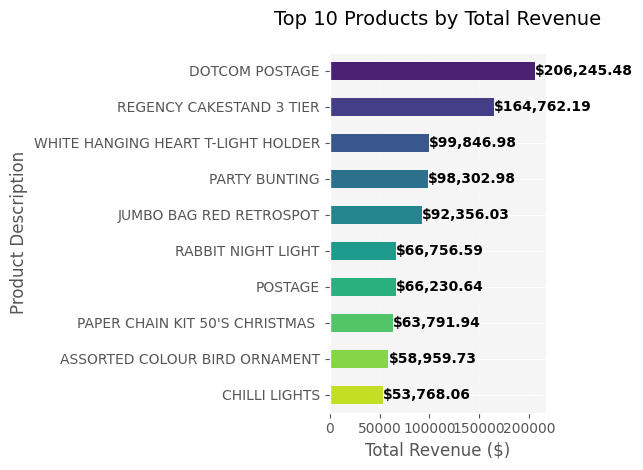

In [ ]:
# Get the top ten products by total spend
top_products= df_temp.groupby(['Description'])['total_spend'].sum().sort_values(ascending=False).head(10)

# create  horizontal bar plot
ax= top_products.plot(kind= 'barh', color=sns.color_palette('viridis', len(top_products)))

# Add value on the bars
for i, v in enumerate(top_products):
    ax.text(v + 0.1, i, f'${v:,.2f}', color= 'black', va= 'center', fontweight= 'bold')

# Customize the plot
plt.title('Top 10 Products by Total Revenue', fontsize=14, pad=20)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.gca().invert_yaxis()  # Highest value at top
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Keep the border/box around the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


plt.tight_layout()
plt.show()

In [ ]:
# print(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[0])
# print(pd.to_datetime(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[0], format="%Y-%m-%d"))

# print(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[1])
# print(pd.to_datetime(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[1], format="%H:%M:%S"))

# Better alternatives
# To get just the date part for all rows
# df_temp['InvoiceDate'].dt.date

# To get just the time part for all rows
# df_temp['InvoiceDate'].dt.time

# Or just the hour
# df_temp['InvoiceDate'].dt.hour


In [86]:
df_temp['hour'] = pd.to_datetime(df_temp['InvoiceDate']).dt.hour
df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8


In [87]:
df_temp.groupby('Country')["InvoiceNo"].count().sort_values(ascending=False).head(20)

Country
United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Unspecified           446
Austria               401
Denmark               389
Japan                 358
Name: InvoiceNo, dtype: int64

<Axes: ylabel='Country'>

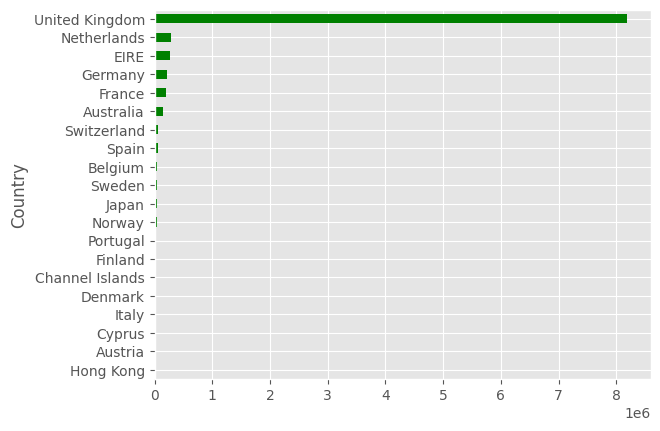

In [96]:
df_temp.groupby('Country')["total_spend"].sum().sort_values(ascending=False).head(20).sort_values(ascending= True).plot(kind='barh', color= 'g')

<Axes: >

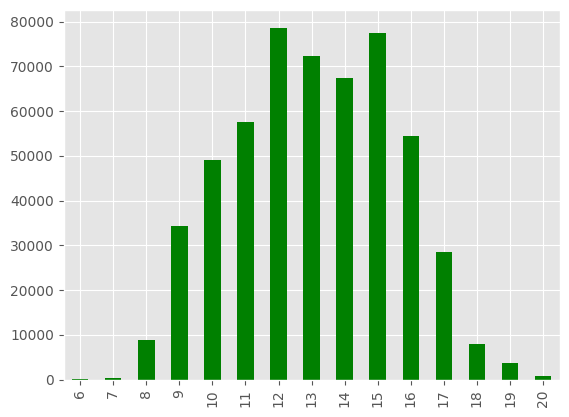

In [97]:
df_temp['hour'].value_counts().sort_index().plot(kind='bar', color= 'g')

Text(0.5, 1.0, 'Total Spend by Hour in United Kingdom')

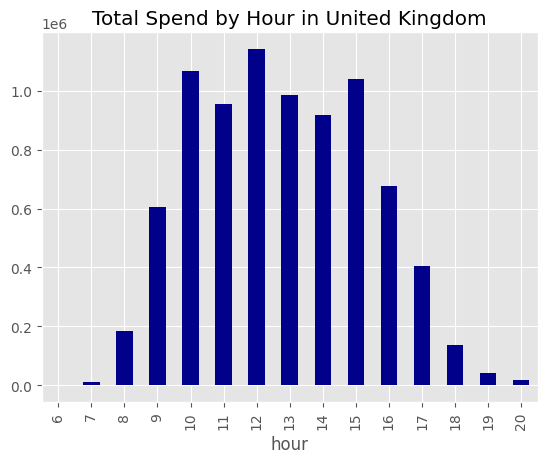

In [98]:
country = "United Kingdom"
df_temp.loc[df_temp['Country'] == f"{country}"].groupby('hour')['total_spend'].sum().plot(kind='bar', color='darkblue')
plt.title(f"Total Spend by Hour in {country}")

In [99]:
df_temp.describe()

,Quantity,UnitPrice,CustomerID,total_spend,hour
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671,17.987795,13.078729
std,218.081158,96.759853,6777.908326,378.810824,2.443270
min,-80995.000000,-11062.060000,0.000000,-168469.600000,6.000000
25%,1.000000,1.250000,12352.000000,3.400000,11.000000
50%,3.000000,2.080000,14382.000000,9.750000,13.000000
75%,10.000000,4.130000,16255.000000,17.400000,15.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,20.000000


In [100]:
df_temp.loc[df_temp['Quantity'] >= 60_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,10
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,9


In [101]:
df_temp.loc[df_temp['UnitPrice'] >= 30_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,-38970.0,15


In [ ]:
df_temp[df_temp['StockCode'] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour


In [103]:
df_temp['StockCode'] = df_temp['StockCode'].str.upper()

In [104]:
df_temp[df_temp['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,1.25,15
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,18.95,15
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,0,United Kingdom,2.55,11
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,1.70,14
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,5.04,11
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,5.00,14
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,-125.00,9
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-9.95,13
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,1.26,13


In [105]:
df_temp[df_temp['Description'] == 'Manual']['total_spend'].describe()

count      572.000000
mean      -120.055315
std       1833.245373
min     -38970.000000
25%        -65.947500
50%          1.000000
75%          9.315000
max       4287.630000
Name: total_spend, dtype: float64

In [106]:
df_temp['Description'].value_counts().tail(20)

Found by jackie                       1
CREAM SWEETHEART TRAYS                1
BLUE/NAT SHELL NECKLACE W PENDANT     1
PINK ALLIUM  ARTIFICIAL FLOWER        1
BAROQUE BUTTERFLY EARRINGS MONTANA    1
WHITE FRANGIPANI HAIR CLIP            1
INCENSE BAZAAR PEACH                  1
GLASS BEAD HOOP NECKLACE BLACK        1
TINY CRYSTAL BRACELET RED             1
BLUE CRYSTAL BOOT PHONE CHARM         1
damages                               1
VINTAGE BLUE TINSEL REEL              1
WEEKEND BAG VINTAGE ROSE PAISLEY      1
WRAP  PINK FLOCK                      1
PINK LARGE JEWELED PHOTOFRAME         1
FLAMINGO LIGHTS                       1
TRAVEL CARD WALLET DOTCOMGIFTSHOP     1
WHITE WITH METAL BAG CHARM            1
GREEN WITH METAL BAG CHARM            1
BLOSSOM IMAGES SCRAP BOOK SET         1
Name: Description, dtype: int64

In [107]:
df_temp.loc[df_temp['Description'] == 'historic computer difference?....se']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour


In [108]:
df_temp.loc[df_temp['StockCode'] == '84944']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
1369,536538,84944,SET OF 6 KASHMIR FOLKART BAUBLES,2,2010-12-01 13:54:00,4.25,14594,United Kingdom,8.50,13
6402,536943,84944,SET OF 6 KASHMIR FOLKART BAUBLES,2,2010-12-03 12:11:00,4.25,17884,United Kingdom,8.50,12
10102,537225,84944,SET OF 6 KASHMIR FOLKART BAUBLES,4,2010-12-05 16:41:00,4.25,12748,United Kingdom,17.00,16
13169,537421,84944,SET OF 6 KASHMIR FOLKART BAUBLES,3,2010-12-06 15:25:00,4.25,17218,United Kingdom,12.75,15
16265,537646,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2010-12-07 15:39:00,4.25,17591,United Kingdom,4.25,15
...,...,...,...,...,...,...,...,...,...,...
428607,573486,84944,SET OF 6 KASHMIR FOLKART BAUBLES,6,2011-10-31 11:40:00,1.65,13186,United Kingdom,9.90,11
428648,573492,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2011-10-31 11:57:00,1.65,13544,United Kingdom,1.65,11
432975,573901,84944,SET OF 6 KASHMIR FOLKART BAUBLES,4,2011-11-01 14:49:00,1.65,14191,United Kingdom,6.60,14
433089,573904,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2011-11-01 14:54:00,1.65,14505,United Kingdom,1.65,14


In [109]:
df_temp.loc[df_temp['Description'] == 'Missing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour


In [110]:
df_temp.loc[df_temp['StockCode'] == '22458'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
2729,536592,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-01 17:06:00,5.06,0,United Kingdom,5.06,17
7558,537045,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-05 10:54:00,2.55,15038,United Kingdom,2.55,10
10524,537237,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-06 09:58:00,5.06,0,United Kingdom,5.06,9
14665,537608,22458,CAST IRON HOOK GARDEN FORK,2,2010-12-07 13:20:00,2.55,15024,United Kingdom,5.10,13
19921,537955,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-09 11:28:00,2.55,16782,United Kingdom,2.55,11


In [111]:
df_temp[df_temp['StockCode'].str.contains('90126')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
27255,538524,90126A,PINK BERTIE MOBILE PHONE CHARM,1,2010-12-13 09:35:00,3.36,0,United Kingdom,3.36,9
265413,560225,90126C,AMBER BERTIE MOBILE PHONE CHARM,2,2011-07-15 16:27:00,3.29,0,United Kingdom,6.58,16


In [112]:
df_temp[df_temp['StockCode'].apply(lambda x: len(x) < 5)]['StockCode'].value_counts()

POST    1256
DOT      710
M        572
C2       144
D         77
S         63
CRUK      16
PADS       4
B          3
Name: StockCode, dtype: int64

In [116]:
# How many times each duplicate appears
dupe_counts = df_temp[df_temp.duplicated(keep=False)].groupby(list(df_temp.columns)).size().reset_index(name='count')
dupe_counts = dupe_counts[dupe_counts['count'] > 1]  # Only show actual duplicates
dupe_counts = dupe_counts.sort_values('count', ascending=False)
dupe_counts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour,count
1614,555524,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-06-05 11:37:00,2.95,16923,United Kingdom,2.95,11,20
1613,555524,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-06-05 11:37:00,2.95,16923,United Kingdom,2.95,11,12
3203,572861,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-10-26 12:46:00,1.25,14102,United Kingdom,15.00,12,8
529,541266,21755,LOVE BUILDING BLOCK WORD,1,2011-01-16 16:25:00,5.95,15673,United Kingdom,5.95,16,6
3147,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607,United Kingdom,72.00,10,6
...,...,...,...,...,...,...,...,...,...,...,...
1683,556484,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-06-12 13:17:00,4.95,16938,United Kingdom,4.95,13,2
1682,556481,23182,TOILET SIGN OCCUPIED OR VACANT,3,2011-06-12 13:00:00,0.83,16115,United Kingdom,2.49,13,2
1681,556473,22727,ALARM CLOCK BAKELIKE RED,1,2011-06-12 12:00:00,3.75,17265,United Kingdom,3.75,12,2
1680,556473,21069,VINTAGE BILLBOARD TEA MUG,1,2011-06-12 12:00:00,1.25,17265,United Kingdom,1.25,12,2


In [118]:
df_temp[df_temp['StockCode'] == "M"]
# df_temp[df_temp['StockCode'].str.contains('POST')]
# df_temp[df_temp['InvoiceNo'].str.startswith('C')]
# df_temp[df_temp['StockCode'].str.contains('DOT')]['StockCode'].value_counts()
# df_temp[df_temp['StockCode'].str.contains('C2')]['Country'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,1.25,15
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,18.95,15
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,0,United Kingdom,2.55,11
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,1.70,14
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,5.04,11
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,5.00,14
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,-125.00,9
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-9.95,13
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,1.26,13


In [119]:
df_temp.groupby('StockCode')['Description'].value_counts().head(20)

StockCode  Description                 
10002      INFLATABLE POLITICAL GLOBE       73
10080      GROOVY CACTUS INFLATABLE         24
10120      DOGGY RUBBER                     30
10123C     HEARTS WRAPPING TAPE              4
10123G     No Description                    1
10124A     SPOTS ON RED BOOKCOVER TAPE       5
10124G     ARMY CAMO BOOKCOVER TAPE          4
10125      MINI FUNKY DESIGN TAPES          94
10133      COLOURING PENCILS BROWN TUBE    200
10134      No Description                    1
10135      COLOURING PENCILS BROWN TUBE    180
11001      ASSTD DESIGN RACING CAR PEN     120
15030      FAN BLACK FRAME                  14
15034      PAPER POCKET TRAVELING FAN      142
15036      ASSORTED COLOURS SILK FAN       524
15039      SANDALWOOD FAN                  149
15044A     PINK PAPER PARASOL              104
15044B     BLUE PAPER PARASOL               62
15044C     PURPLE PAPER PARASOL             91
15044D     RED PAPER PARASOL                87
Name: Description, d

In [120]:
df_temp.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_spend', 'hour'],
      dtype='object')

In [121]:
# Standardize product descriptions by using the most frequent description for each StockCode
# This handles cases where the same product has slightly different descriptions
# (e.g., extra spaces, case differences, or typos)

most_freq = df_temp.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()


In [124]:
df = pd.merge(df_temp, most_freq, on='StockCode', how='left', suffixes=('_original', '_standardized')) # Custom suffixes
df.head()

,InvoiceNo,StockCode,Description_original,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour,Description_standardized
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,RED WOOLLY HOTTIE WHITE HEART.


In [126]:
df = df.drop(columns=['Description_original'])
df = df.rename(columns={'Description_standardized': 'Description'})
df = df.reindex(columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'total_spend', 'hour'])

In [129]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8


In [130]:
df_temp.loc[df_temp['Description'] == 'damaged'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour


In [131]:
df_temp.loc[df_temp['StockCode'].str.contains("10123")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend,hour
5451,536863,10123C,HEARTS WRAPPING TAPE,1,2010-12-03 11:19:00,0.65,17967,United Kingdom,0.65,11
109611,545655,10123C,HEARTS WRAPPING TAPE,3,2011-03-04 13:58:00,0.65,14670,United Kingdom,1.95,13
140929,548491,10123C,HEARTS WRAPPING TAPE,1,2011-03-31 13:14:00,0.65,14064,United Kingdom,0.65,13
150159,549349,10123G,No Description,-38,2011-04-08 11:13:00,0.00,0,United Kingdom,-0.00,11
265293,560213,10123C,HEARTS WRAPPING TAPE,-18,2011-07-15 15:05:00,0.00,0,United Kingdom,-0.00,15


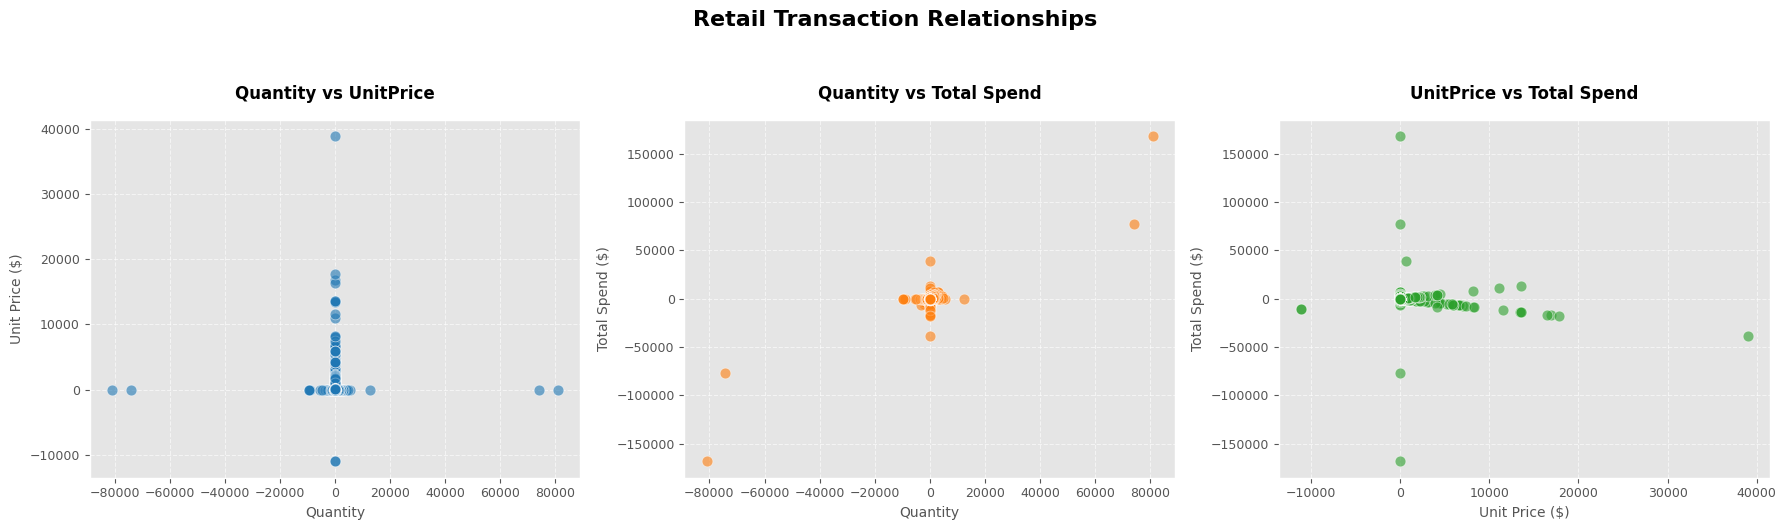

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust space between subplots

# Common plot settings
plot_kwargs = {
    'alpha': 0.6,           # Slightly transparent points
    'edgecolor': 'w',       # White border around points
    's': 60                 # Point size
}

# 1. Quantity vs UnitPrice
sc1 = ax[0].scatter(
    x=df_temp['Quantity'], 
    y=df_temp['UnitPrice'],
    c='#1f77b4',  # Nice blue color
    **plot_kwargs
)
ax[0].set_title('Quantity vs UnitPrice', pad=15, fontsize=12, fontweight='bold')
ax[0].set_xlabel('Quantity', fontsize=10)
ax[0].set_ylabel('Unit Price ($)', fontsize=10)
ax[0].tick_params(labelsize=9)
ax[0].grid(True, linestyle='--', alpha=0.6)

# 2. Quantity vs Total Spend
sc2 = ax[1].scatter(
    x=df_temp['Quantity'], 
    y=df_temp['total_spend'],
    c='#ff7f0e',  # Orange color
    **plot_kwargs
)
ax[1].set_title('Quantity vs Total Spend', pad=15, fontsize=12, fontweight='bold')
ax[1].set_xlabel('Quantity', fontsize=10)
ax[1].set_ylabel('Total Spend ($)', fontsize=10)
ax[1].tick_params(labelsize=9)
ax[1].grid(True, linestyle='--', alpha=0.6)

# 3. UnitPrice vs Total Spend
sc3 = ax[2].scatter(
    x=df_temp['UnitPrice'], 
    y=df_temp['total_spend'],
    c='#2ca02c',  # Green color
    **plot_kwargs
)
ax[2].set_title('UnitPrice vs Total Spend', pad=15, fontsize=12, fontweight='bold')
ax[2].set_xlabel('Unit Price ($)', fontsize=10)
ax[2].set_ylabel('Total Spend ($)', fontsize=10)
ax[2].tick_params(labelsize=9)
ax[2].grid(True, linestyle='--', alpha=0.6)


# Add a main title
plt.suptitle('Retail Transaction Relationships', 
             fontsize=16, 
             fontweight='bold', 
             y=1.05)

plt.tight_layout()
plt.show()

---

In [ ]:
# Final Data Cleaning and Export
# =============================

# Load fresh data (in case we modified it during EDA)
# df= pd.read_csv(r"E:\Smartcart_Retail_Analytics\data\uncleaned_data.csv", encoding= 'latin1')
df = pd.read_csv("./data/uncleaned_data.csv", encoding='cp1252')

# Clean the data
# Handling missing values
# df['Description'] = df['Description'].fillna('No Description')
df['CustomerID'] = df['CustomerID'].fillna(0)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['total_spend'] = df['Quantity'] * df['UnitPrice']

# convert datatypes
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(float).astype(int)
df['Country'] = df['Country'].astype(str)
df['total_spend'] = df['total_spend'].astype(float)

# Standardize product description
df['StockCode'] = df['StockCode'].str.upper()
most_freq = df.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()
columns_index = df.columns
df = df.drop(columns=['Description'])
df = pd.merge(df, most_freq, on='StockCode', how='left')
df = df.reindex(columns= columns_index)

# Write the cleaned data to a new csv file
# df.to_parquet("./data/cleaned_data.parquet")
df.to_csv("./data/cleaned_data.csv")

---